In [1]:
pip install darts

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from darts import TimeSeries

In [3]:
df = pd.read_csv('output2.csv',usecols=[1])[:60000].clip(0)

In [4]:
df

,Plasma_current
0,0.0000
1,1.3591
2,5.7585
3,11.6940
4,17.8730
...,...
59995,0.0000
59996,0.0000
59997,0.0000
59998,0.0000


In [5]:
dates = pd.date_range(start='1/1/1900',periods=len(df), freq='D')

In [6]:
df.index = pd.to_datetime(dates, format='%d.%m.%Y %H:%M:%S')

In [7]:
df[:400].tail()

,Plasma_current
1901-01-31,0.0
1901-02-01,0.0
1901-02-02,0.0
1901-02-03,0.0
1901-02-04,0.0


In [8]:
df.tail()

,Plasma_current
2064-04-05,0.0
2064-04-06,0.0
2064-04-07,0.0
2064-04-08,0.0
2064-04-09,0.0


In [9]:
series= TimeSeries.from_dataframe(df)

<Axes: xlabel='time'>

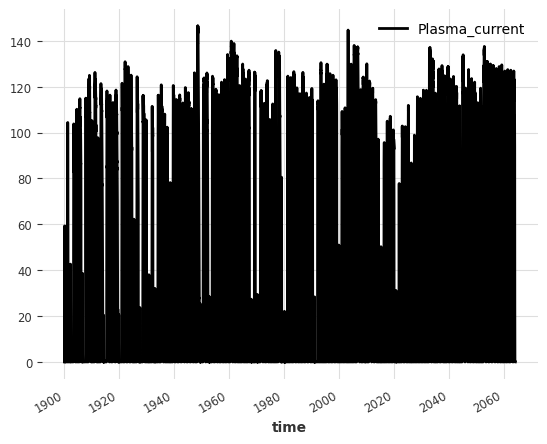

In [10]:
series.plot()

In [11]:
from darts.dataprocessing.transformers  import Scaler
scaler = Scaler()
series_scaled = scaler.fit_transform(series)

<Axes: xlabel='time'>

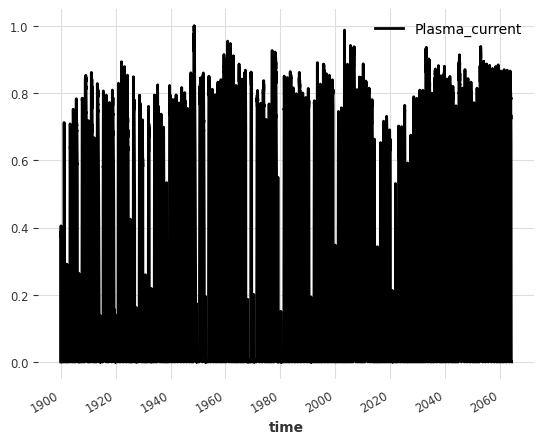

In [12]:
series_scaled.plot()

<Axes: xlabel='time'>

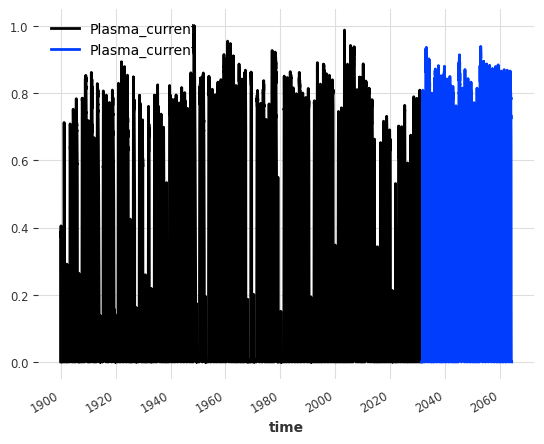

In [13]:
train, test = series_scaled.split_after(0.8)
train.plot()
test.plot()

In [14]:
len(test)

12000

In [15]:
from darts.models import RNNModel , TCNModel,  TransformerModel, NBEATSModel, BlockRNNModel, ExponentialSmoothing, LinearRegressionModel
from darts.metrics import mse, mape

In [16]:
model = NBEATSModel(
    input_chunk_length=10,
    output_chunk_length=20,
    n_epochs=10,
    activation='LeakyReLU'
)

In [17]:
model.fit(train)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.1 M 
---------------------------------------------------
6.1 M     Trainable params
1.3 K     Non-trainable params
6.1 M     Total params
24.353    Total estimated model params size (MB)


Training: |                                                                                      | 0/? [00:00<…

`Trainer.fit` stopped: `max_epochs=10` reached.


NBEATSModel(output_chunk_shift=0, generic_architecture=True, num_stacks=30, num_blocks=1, num_layers=4, layer_widths=256, expansion_coefficient_dim=5, trend_polynomial_degree=2, dropout=0.0, activation=LeakyReLU, input_chunk_length=10, output_chunk_length=20, n_epochs=10)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting: |                                                                                    | 0/? [00:00<…

<Axes: xlabel='time'>

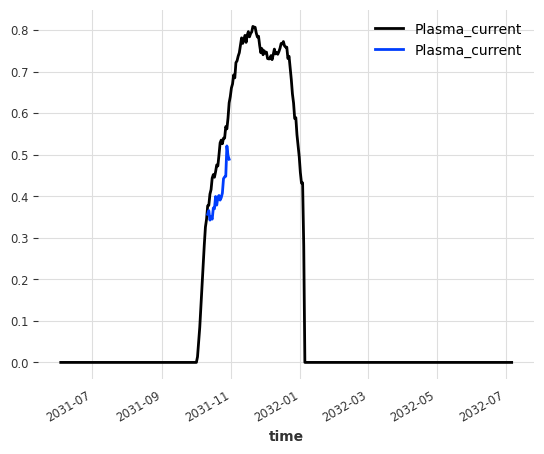

In [41]:
pred = model.predict(n=20,series=test[140:150])
test[0:400].plot()
pred.plot()

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting: |                                                                                    | 0/? [00:00<…

<Axes: xlabel='time'>

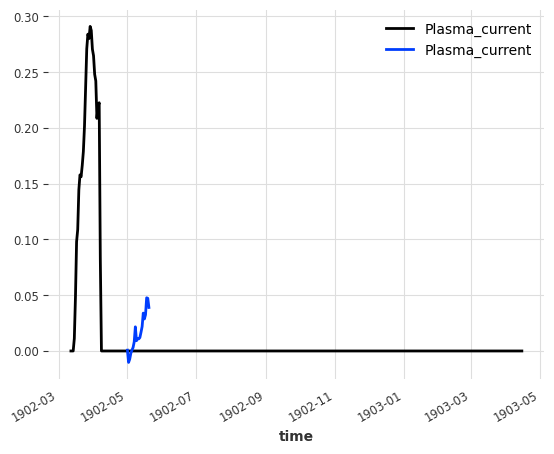

In [19]:
pred = model.predict(n=20,series=series_scaled[840:850])
series_scaled[800:1200].plot()
pred.plot()

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting: |                                                                                    | 0/? [00:00<…

<Axes: xlabel='time'>

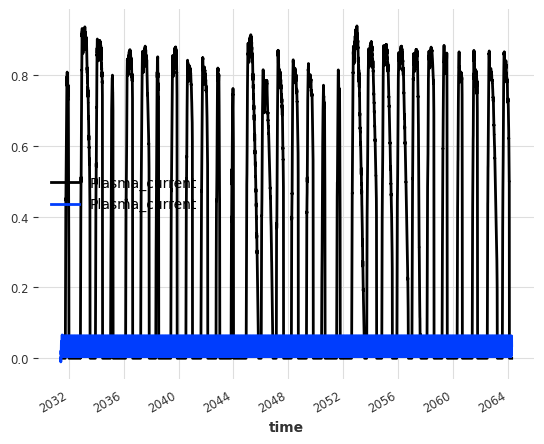

In [28]:
pred = model.predict(n=len(test),series=train)
test.plot()
pred.plot()